In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
imdb = pd.read_csv("../dados/imdb.csv")

## Gráficos de dispersão

In [ ]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita")

In [ ]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita")
plt.axline([0,0], slope = 1, color="red")


In [ ]:
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro")

In [ ]:
imdb_lucro2 = imdb.assign(
    lucrou = lambda x: np.select(
        [x.receita > x.orcamento, x.receita <= x.orcamento],
        ["Sim", "Não"],
        "Sem info"
    )
)
sns.scatterplot(data=imdb_lucro2, x="orcamento", y ="receita", hue="lucrou")

In [ ]:
sns.scatterplot(data=imdb, x="orcamento", y ="receita", color="red")

In [ ]:
sns.scatterplot(data=imdb_lucro2, x="orcamento", y ="receita", hue="lucrou", palette = {
    "Sem info": "gray",
    "Sim": "green",
    "Não": "red"
})

## Gráficos de linha

In [ ]:
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")

In [ ]:
notas_spielberg = (imdb.
    query("direcao == 'Steven Spielberg'").
    groupby("ano", as_index=False).
    agg(
        nota_media = ("nota_imdb", "mean")
    )
)
plot = sns.lineplot(data=notas_spielberg, x="ano", y="nota_media")
for _, ano, nota_media in notas_spielberg.itertuples():
    plot.annotate(round(nota_media,1), (ano, nota_media + 0.1), bbox={"facecolor":'white'})


## Gráficos de barras

In [ ]:
top_direcao = (imdb.
    groupby("direcao", as_index=False).
    agg(
        n_filmes = ("titulo", "count")
    ).
    nlargest(10, "n_filmes").
    sort_values("n_filmes", ascending=False)
)
sns.barplot(top_direcao, x="direcao", y="n_filmes", color="grey")
plt.xticks(rotation=45, ha='right')


In [ ]:
sns.barplot(top_direcao, x="n_filmes", y="direcao")

## Gráficos de distribuição

<AxesSubplot: xlabel='lucro', ylabel='Count'>

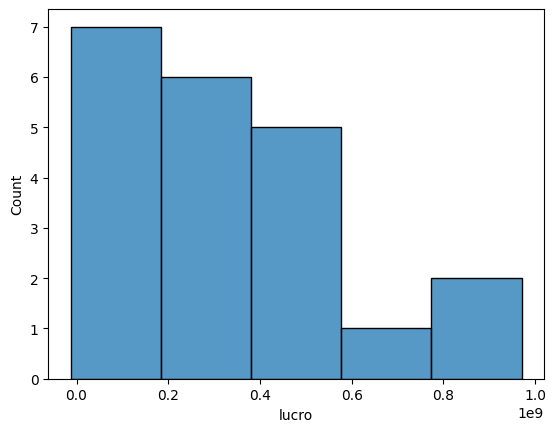

In [6]:
lucro_spielberg = (imdb.
    query("direcao=='Steven Spielberg'").
    assign(lucro=lambda x: x.receita-x.orcamento)
    )
sns.histplot(data=lucro_spielberg, x="lucro", bins=5)

<AxesSubplot: xlabel='lucro', ylabel='Count'>

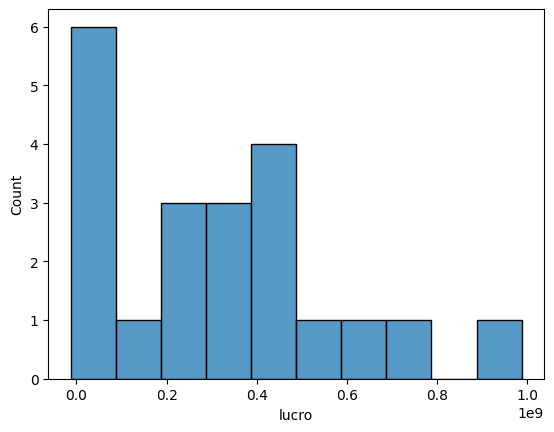

In [7]:
sns.histplot(data=lucro_spielberg, x="lucro", binwidth=100000000)

In [27]:

(imdb.assign(
    n_filmes = imdb.groupby("direcao")["titulo"].transform("nunique")
).filter(["direcao", "n_filmes"]).sort_values("n_filmes", ascending=False))

imdb.value_counts("direcao")


direcao
Michael Curtiz        82
Lesley Selander       77
Lloyd Bacon           73
William Beaudine      67
John Ford             65
                      ..
Jada Pinkett Smith     1
Jade Jenise Dixon      1
Jaffar Mahmood         1
Jaffe Zinn             1
Özgür Dogruöz          1
Length: 12458, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Michael Curtiz'),
  Text(1, 0, 'Lloyd Bacon'),
  Text(2, 0, 'John Ford'),
  Text(3, 0, 'Raoul Walsh'),
  Text(4, 0, 'William A. Seiter'),
  Text(5, 0, 'William A. Wellman')])

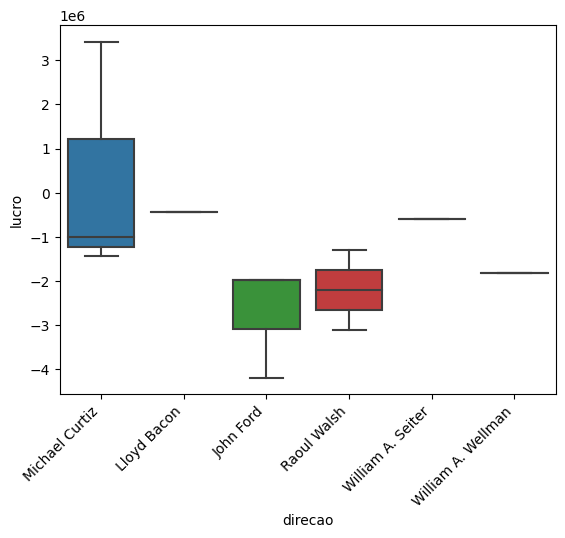

In [37]:
direcao_com_mais_filmes = (imdb.
    query("~direcao.isnull()").
    assign(
        n_filmes = lambda x: x.groupby("direcao")["direcao"].transform("count"),
        lucro = lambda x: x.receita - x.orcamento
    ).
    query("n_filmes > 50 & ~lucro.isnull()").
    sort_values("n_filmes", ascending=False)
)

sns.boxplot(data=direcao_com_mais_filmes, x="direcao", y = "lucro")
plt.xticks(rotation=45, ha='right')

## Titulos labels, etc

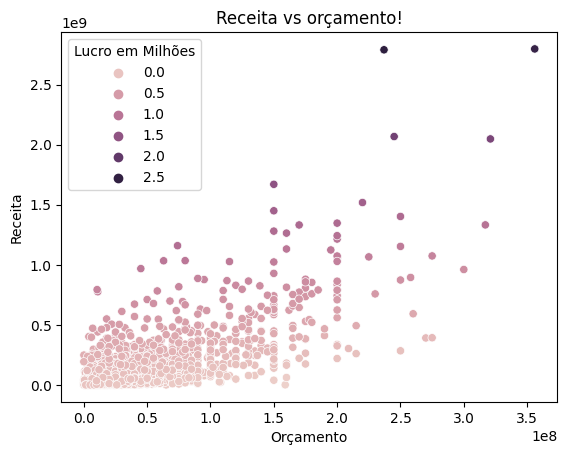

In [46]:
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro")
plt.xlabel("Orçamento")
plt.ylabel("Receita")
plt.title("Receita vs orçamento!")
plt.legend(title="Lucro em Milhões")

([<matplotlib.axis.XTick at 0x7fbadaabf2e0>,
 [Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1920, 0, '1920'),
  Text(1930, 0, '1930'),
  Text(1940, 0, '1940'),
  Text(1950, 0, '1950'),
  Text(1960, 0, '1960'),
  Text(1970, 0, '1970'),
  Text(1980, 0, '1980'),
  Text(1990, 0, '1990'),
  Text(2000, 0, '2000'),
  Text(2010, 0, '2010')])

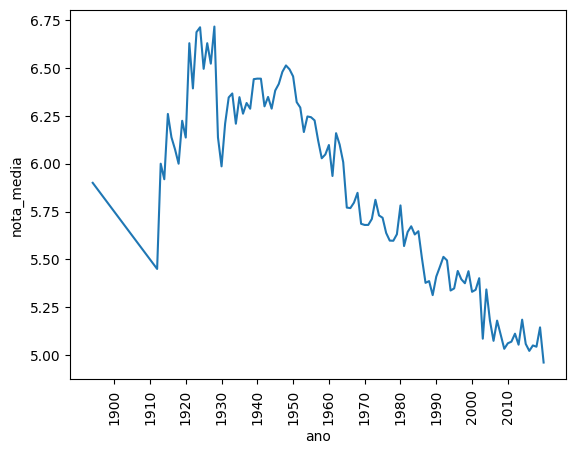

In [50]:
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")
plt.xticks(range(1900, 2020, 10), rotation=90)

(1930.0, 2030.0)

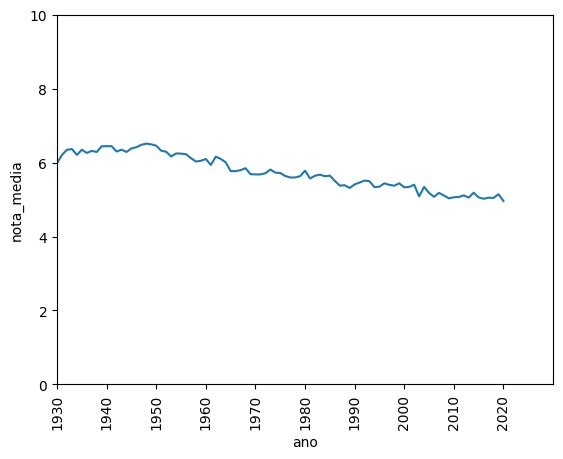

In [56]:
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")
plt.xticks(range(1900, 2030, 10), rotation=90)
plt.ylim(0, 10)
plt.xlim(1930, 2030)

<AxesSubplot: xlabel='ano', ylabel='nota_media'>

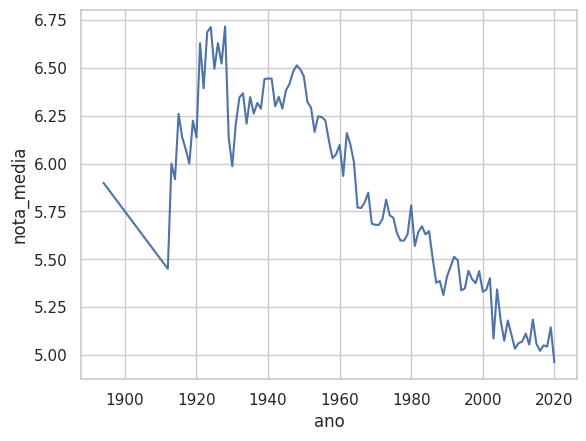

In [58]:
sns.set_theme()
sns.set_theme(style="whitegrid")
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media")

## Facets

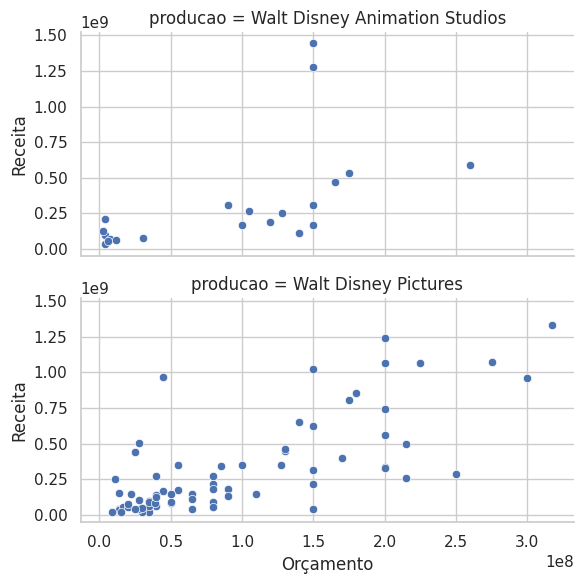

In [67]:
disney = imdb[imdb.producao.isin(["Walt Disney Animation Studios", "Walt Disney Pictures"])]
g = sns.FacetGrid(disney, col="producao", col_wrap=1, aspect=2)
g.map(sns.scatterplot, "orcamento", "receita")
g.set_ylabels("Receita")
g.set_xlabels("Orçamento")

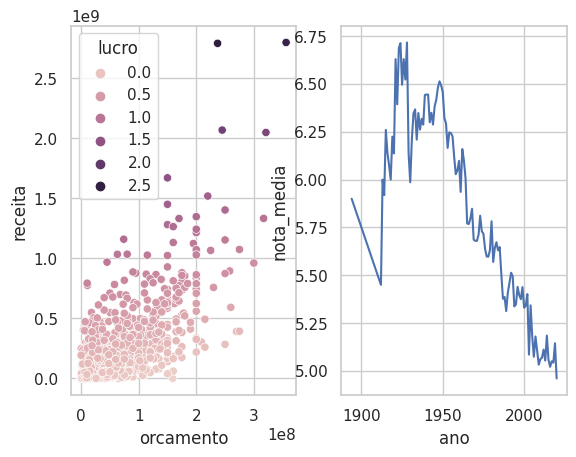

In [79]:
fig, axes = plt.subplots(1, 2)
plt.subplots(1, 2)
imdb_lucro = imdb.assign(
    lucro = lambda x: x.receita - x.orcamento
)
sns.scatterplot(data=imdb_lucro, x="orcamento", y ="receita", hue="lucro", ax = axes[0])
notas_por_ano = imdb.groupby("ano", as_index=False).agg(
    nota_media = ("nota_imdb", "mean")
)
sns.lineplot(data=notas_por_ano, x="ano", y="nota_media", ax=axes[1])
plt.close() # para não duplicar o gráfico no jupyter.
